In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def resize_image(image, new_height=None, new_width=None, percentage=None):
    # Calculate the new width and height based on the percentage
    height, width = image.shape[:2]
    
    if new_height:
        new_width = int(width * (new_height/height))
    elif not new_height and new_width:
        new_height = int(height * (new_width/width))
    elif not new_height and not new_height and percentage:
        new_width = int(width * percentage / 100)
        new_height = int(height * percentage / 100)

    # Resize the image using the calculated dimensions
    resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)

    return resized_image

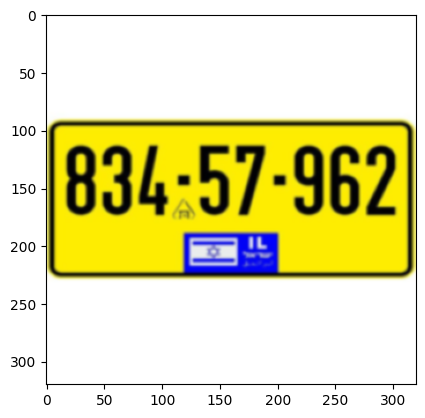

In [39]:
img = cv2.imread(r"Images/t2.jpg")
resized_img = resize_image(img, None, 320)
blurred_image = cv2.GaussianBlur(resized_img, (5, 5), 0)
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))

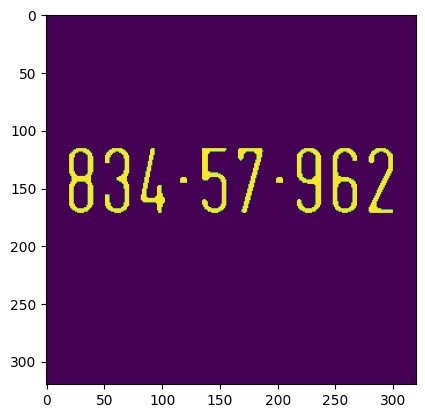

In [35]:
hsv_image = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2HSV)
lower_range = np.array([0, 0, 0])  # Lower range of HSV values for the characters (black color)
upper_range = np.array([180, 255, 40])  # Upper range of HSV values for the characters (light gray color)
mask = cv2.inRange(hsv_image, lower_range, upper_range)

# Perform morphological operations (optional) to clean up the mask:
kernel = np.ones((3, 3), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
plt.imshow(mask)

In [36]:
contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [37]:
for contour in contours:
    area = cv2.contourArea(contour)
    if 200 < area < 1000:  # Adjust the area threshold as needed
    # if True:  # Adjust the area threshold as needed
        print(area)
        x, y, w, h = cv2.boundingRect(contour)
        # print((x, y), (x + w, y + h))
        # print("AAA")
        digit = img[y:y+h, x:x+w]
        ratio = h/w
        print(ratio)
        if 1.5 < ratio < 5:
            cv2.rectangle(resized_img, (x, y), (x + w, y + h), (0, 255, 0), 1)
            print("Rec")
        else:
            print("False")
        print("-------------")
        # Process the extracted digit (e.g., save it or further analyze it)
        # You can use OCR techniques to recognize the digit as a character.

303.5
2.6666666666666665
Rec
-------------
688.0
2.6666666666666665
Rec
-------------
295.0
1.6666666666666667
Rec
-------------
702.5
2.6666666666666665
Rec
-------------
286.0
1.8571428571428572
Rec
-------------
269.5
2.5454545454545454
Rec
-------------
342.5
2.6666666666666665
Rec
-------------
267.5
2.6666666666666665
Rec
-------------
334.0
2.6666666666666665
Rec
-------------
283.0
1.7857142857142858
Rec
-------------
252.5
1.6428571428571428
Rec
-------------


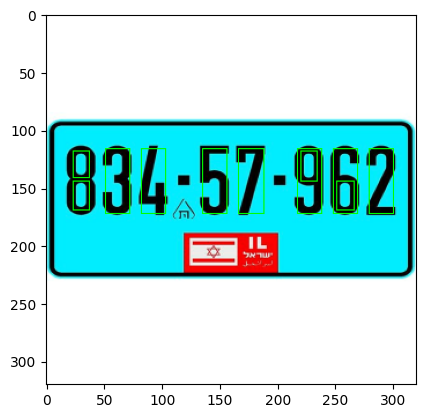

In [38]:
plt.imshow(resized_img)